In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a widely used dimensionality reduction technique that simplifies the complexity in high-dimensional data while preserving the essential structure and relationships. It accomplishes this by transforming the original features into a new set of uncorrelated variables called principal components (PCs), which are linear combinations of the original features. PCA aims to retain as much of the variance in the data as possible while reducing the number of dimensions.

##### Steps Involved in PCA:

Standardization: If the features have different scales, it's essential to standardize them (subtracting the mean and dividing by the standard deviation) to ensure that each feature contributes equally to the analysis.

Covariance Matrix Computation: Calculate the covariance matrix of the standardized data. The covariance matrix provides information about the relationships between pairs of features and their variances.

Eigendecomposition: Perform eigendecomposition on the covariance matrix to obtain the eigenvectors and eigenvalues. Eigenvectors represent the directions (principal components) of maximum variance in the data, while eigenvalues represent the magnitude of variance along these directions.

Selection of Principal Components: Rank the eigenvectors based on their corresponding eigenvalues in descending order. The eigenvectors with the highest eigenvalues (explained variance) are selected as the principal components.

Projection: Transform the original data onto the new feature space spanned by the selected principal components. This is achieved by computing the dot product of the original data with the selected eigenvectors.

##### Working Principle of PCA:

PCA works by identifying the directions in the feature space where the data varies the most. These directions correspond to the eigenvectors of the covariance matrix, which capture the principal axes of variation in the data. By selecting a subset of these eigenvectors (principal components) based on their corresponding eigenvalues, PCA constructs a lower-dimensional representation of the data that retains most of its variance.

##### Advantages of PCA:

Dimensionality Reduction: PCA reduces the number of dimensions in the data while retaining most of its variance. This simplifies the analysis and visualization of high-dimensional datasets.

Feature Compression: PCA can compress the information in the data into a smaller number of principal components, which can be beneficial for storage and computational efficiency.

##### Disadvantages of PCA:

Loss of Interpretability: The principal components obtained from PCA are linear combinations of the original features, which may not have a straightforward interpretation in terms of the original variables. This can make it challenging to interpret the meaning of the principal components.

Assumption of Linearity: PCA assumes that the underlying relationships in the data are linear. If the data has nonlinear relationships, PCA may not capture the essential structure accurately.

explained_variance_ratio = [0.72962445 0.22850762 0.03668922 0.00517871]
cumulative_explained_variance = [0.72962445 0.95813207 0.99482129 1.        ]
Explained Variance by PC1: 0.7296244541329987
Explained Variance by PC2: 0.2285076178670178


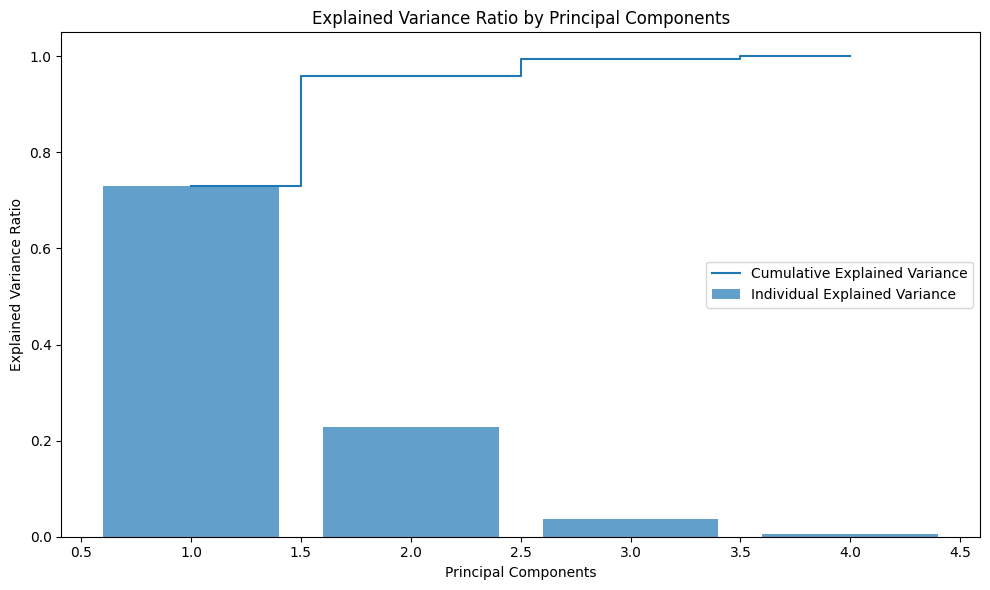

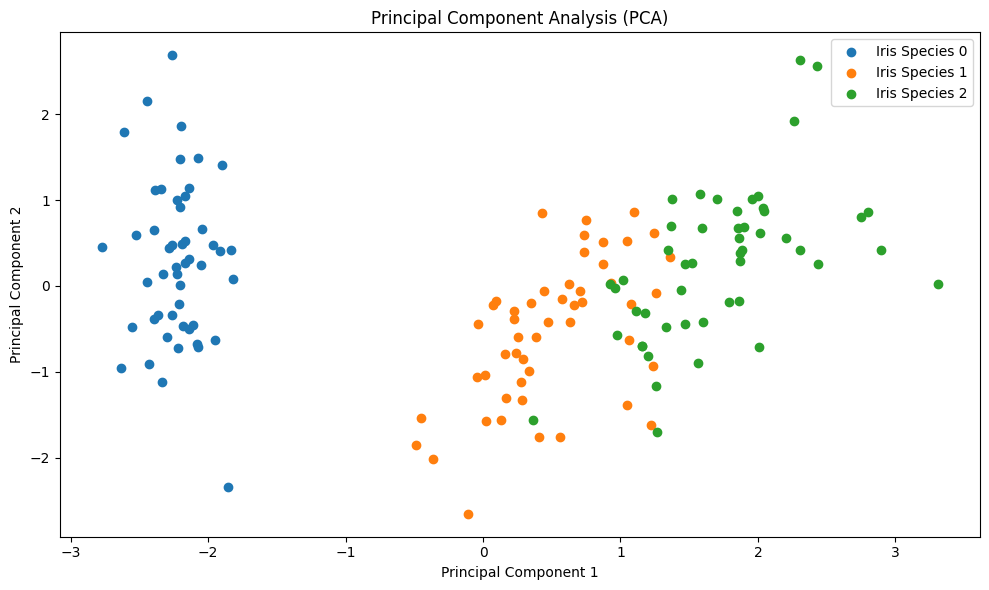

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"explained_variance_ratio = {explained_variance_ratio}")

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(f"cumulative_explained_variance = {cumulative_explained_variance}")

# Explained variance by PC1 and PC2
explained_variance_pc1 = explained_variance_ratio[0]
explained_variance_pc2 = explained_variance_ratio[1]
print(f"Explained Variance by PC1: {explained_variance_pc1}")
print(f"Explained Variance by PC2: {explained_variance_pc2}")

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center',
        label='Individual Explained Variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid',
         label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Plot the first two principal components
plt.figure(figsize=(10, 6))
for target_class in np.unique(y):
    plt.scatter(X_pca[y == target_class, 0], X_pca[y == target_class, 1], label=f'Iris Species {target_class}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis (PCA)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()